In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras

In [3]:
import os
import cv2

In [4]:
data_path='Data'
categories=os.listdir(data_path)

In [6]:
label=[i for i in range(len(categories))]

In [8]:
label_dict=dict(zip(categories,label))

In [9]:
label_dict

{'No_Mask': 0, 'Mask': 1}

In [11]:
img_size=150
data=[]
target=[]
for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
    
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
        except Exception as e:
            print('Exception: ',e)

In [16]:
data=np.array(data)/255.0
data=data.reshape(data.shape[0],img_size,img_size,1)
target=np.array(target)

In [17]:
target_final=keras.utils.to_categorical(target)

In [18]:
from keras import models,layers

Using TensorFlow backend.


In [29]:
model=models.Sequential([
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
     
    layers.Flatten(),
    layers.Dense(64),
    layers.Dropout(0.2),
    layers.Dense(2,activation='sigmoid')
])

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data, target_final, test_size=0.2 )

In [33]:
history=model.fit(X_train,y_train,epochs=10, validation_split=0.2)

Train on 880 samples, validate on 220 samples
Epoch 1/10
880/880 [==============================] - 58s 65ms/step - loss: 9.0173 - accuracy: 0.5284 - val_loss: 0.7317 - val_accuracy: 0.6136
Epoch 2/10
880/880 [==============================] - 25s 28ms/step - loss: 0.6220 - accuracy: 0.6852 - val_loss: 0.6211 - val_accuracy: 0.7045
Epoch 3/10
880/880 [==============================] - 22s 25ms/step - loss: 0.4513 - accuracy: 0.8205 - val_loss: 0.4860 - val_accuracy: 0.7795
Epoch 4/10
880/880 [==============================] - 24s 27ms/step - loss: 0.2685 - accuracy: 0.9284 - val_loss: 0.4070 - val_accuracy: 0.8386
Epoch 5/10
880/880 [==============================] - 27s 30ms/step - loss: 0.1676 - accuracy: 0.9568 - val_loss: 0.4596 - val_accuracy: 0.7977
Epoch 6/10
880/880 [==============================] - 22s 25ms/step - loss: 0.1235 - accuracy: 0.9699 - val_loss: 0.3530 - val_accuracy: 0.8659
Epoch 7/10
880/880 [==============================] - 22s 25ms/step - loss: 0.0725 - accur

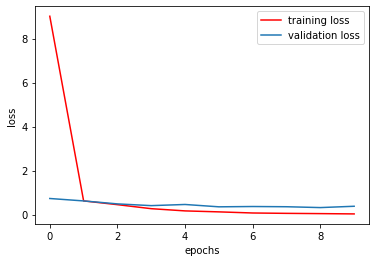

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'],'r',label='training loss' )
plt.plot(history.history['val_loss'],label='validation loss' )
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

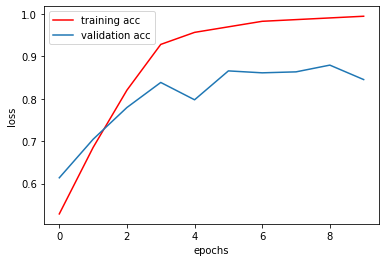

In [36]:
plt.plot(history.history['accuracy'],'r',label='training acc' )
plt.plot(history.history['val_accuracy'],label='validation acc' )
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [37]:
model.evaluate(X_test,y_test)

276/276 [==============================] - 2s 6ms/step


[0.418814946775851, 0.8659420013427734]

In [39]:
model.save('model.h5')

In [54]:
face_clsr=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
source=cv2.VideoCapture(0)
label_dic={0:'No Mask',1:'Mask'}
 

In [55]:
while(True):
    ret,img=source.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_clsr.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(150,150))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,150,150,1))
        result=model.predict(reshaped)
        
        label=np.argmax(result,axis=1)[0]
        cv2.rectangle(img,(x,y),(x+w,y+h),255,0,0,2)
        cv2.putText(img,label_dic[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    cv2.imshow('img',img)
    if cv2.waitKey(1)& 0xFF==ord('q'):
        break
cv2.destroyAllWindows()
source.release()